In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import matplotlib.colors as mcolors
import pandas as pd
#import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS")

In [2]:
path = '/home/miguel/eic/eic_endcap_insert/'
events = ur.open(path+'2degree.root:events')
arrays = events.arrays()

In [3]:
#Printing structure

In [4]:
arrays

<Array [{'MCParticles.PDG': [-211], ... 1, 1]}] type='1000 * {"MCParticles.PDG":...'>

In [5]:
arrays['MCParticles.mass']

<Array [[0.14], [0.14], ... [0.14], [0.14]] type='1000 * var * float64'>

In [6]:
pz = ak.to_numpy(arrays['MCParticles.momentum.z'][:,-1])
py = ak.to_numpy(arrays['MCParticles.momentum.y'][:,-1])
px = ak.to_numpy(arrays['MCParticles.momentum.x'][:,-1])
mass = ak.to_numpy(arrays['MCParticles.mass'][:,-1])
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

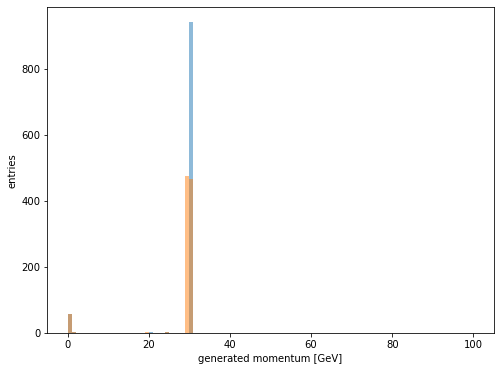

1000


In [7]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

## Hit level information


903534


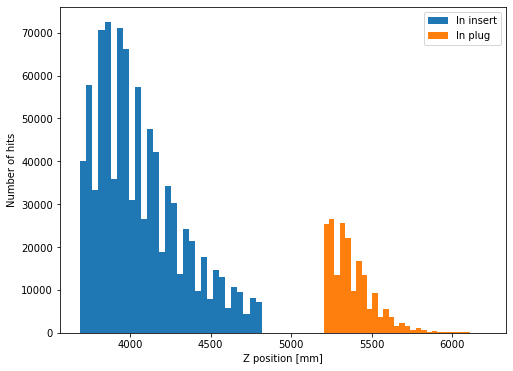

In [8]:
fig = plt.figure( figsize=(8, 6))
print(len(ak.flatten(arrays['HcalEndcapPInsertHits.position.z'])))
plt.hist(ak.flatten(arrays['HcalEndcapPInsertHits.position.z']),
         #weights= ak.flatten(arrays['HcalEndcapPInsertHits.energy']),
         bins=30,label='In insert')
plt.hist(ak.flatten(arrays['LeakedHits.position.z']),
         #weights = ak.flatten(arrays['LeakedHits.energy']), 
                              bins=30, label='In plug')
plt.legend()
plt.ylabel('Number of hits')
plt.xlabel('Z position [mm]')

plt.show()

903534


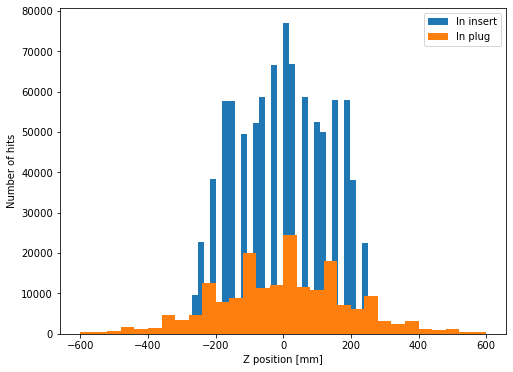

In [9]:
fig = plt.figure( figsize=(8, 6))
print(len(ak.flatten(arrays['HcalEndcapPInsertHits.position.z'])))
plt.hist(ak.flatten(arrays['HcalEndcapPInsertHits.position.x']),
         #weights= ak.flatten(arrays['HcalEndcapPInsertHits.energy']),
         bins=30,label='In insert')
plt.hist(ak.flatten(arrays['LeakedHits.position.x']),
         #weights = ak.flatten(arrays['LeakedHits.energy']), 
                              bins=30, label='In plug')
plt.legend()
plt.ylabel('Number of hits')
plt.xlabel('Z position [mm]')

plt.show()

903534


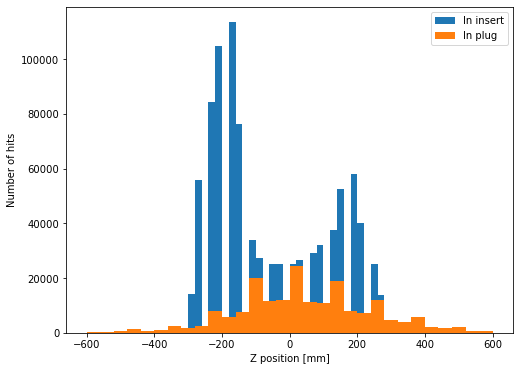

In [10]:
fig = plt.figure( figsize=(8, 6))
print(len(ak.flatten(arrays['HcalEndcapPInsertHits.position.z'])))
plt.hist(ak.flatten(arrays['HcalEndcapPInsertHits.position.y']),
         #weights= ak.flatten(arrays['HcalEndcapPInsertHits.energy']),
         bins=30,label='In insert')
plt.hist(ak.flatten(arrays['LeakedHits.position.y']),
         #weights = ak.flatten(arrays['LeakedHits.energy']), 
                              bins=30, label='In plug')
plt.legend()
plt.ylabel('Number of hits')
plt.xlabel('Z position [mm]')

plt.show()

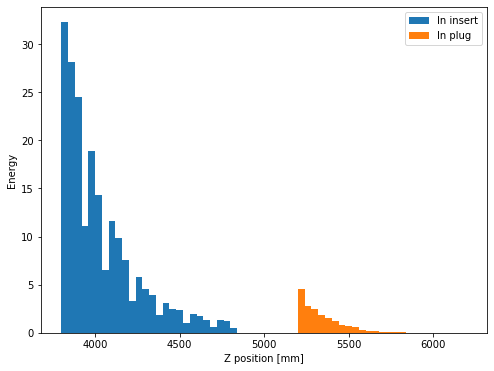

In [11]:
fig = plt.figure( figsize=(8, 6))

plt.hist(ak.flatten(arrays['HcalEndcapPInsertHits.position.z']),
         weights= ak.flatten(arrays['HcalEndcapPInsertHits.energy']),
         bins=60,range=(3800,6200),label='In insert')
plt.hist(ak.flatten(arrays['LeakedHits.position.z']),
         weights = ak.flatten(arrays['LeakedHits.energy']), 
                              bins=60,range=(3800,6200), label='In plug')
plt.legend()
plt.ylabel('Energy')
plt.xlabel('Z position [mm]')

plt.show()

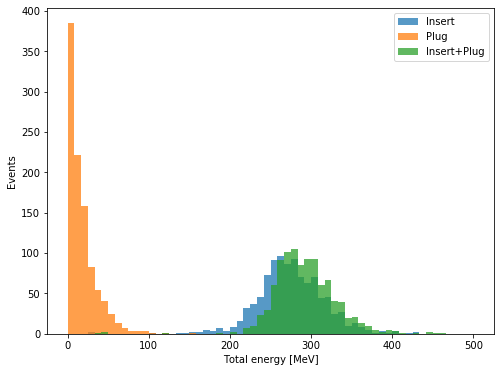

In [12]:
fig = plt.figure( figsize=(8, 6))
#ak.sum(hits,axis=-1)
plt.hist(1000.0*ak.sum(arrays['HcalEndcapPInsertHits.energy'],-1),range=(0,500),bins=60,alpha=0.75,label='Insert')
plt.hist(1000.0*ak.sum(arrays['LeakedHits.energy'],-1),range=(0,500),bins=60,alpha=0.75, label='Plug')
plt.hist(1000.0*ak.sum(arrays['HcalEndcapPInsertHits.energy'],-1)+1000.0*ak.sum(arrays['LeakedHits.energy'],-1),range=(0,500),bins=60,alpha=0.75,label='Insert+Plug')
plt.legend()
plt.ylabel('Events')
plt.xlabel('Total energy [MeV]')
plt.show()

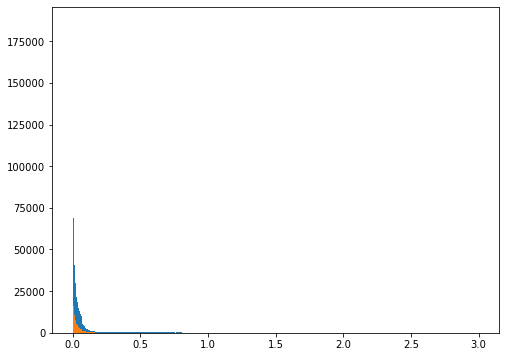

In [13]:
fig = plt.figure( figsize=(8, 6))

plt.hist(1000.0*ak.flatten(arrays['HcalEndcapPInsertHits.energy']),range=(0,3),bins=1000)
plt.hist(1000.0*ak.flatten(arrays['LeakedHits.energy']),range=(0,3),bins=1000)

#plt.yscale('log')
#plt.xscale('log')

plt.show()

In [14]:
print(len(arrays['HcalEndcapPInsertHits.position.x'][:]))
print(len(arrays['HcalEndcapPInsertHits.energy'][:]))
print(len(arrays['LeakedHits.energy'][:]))



1000
1000
1000


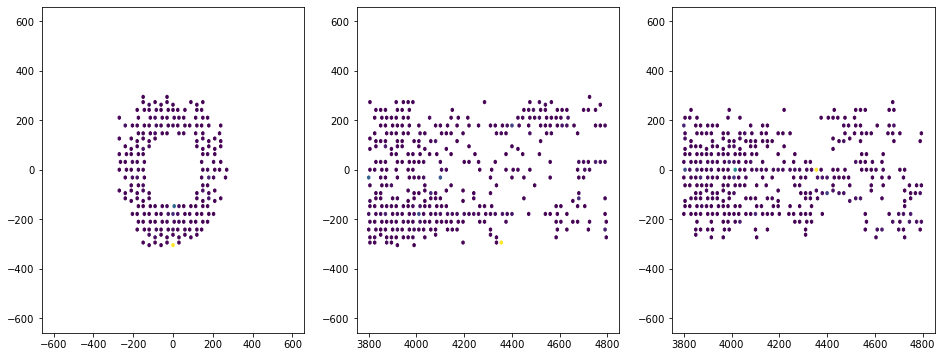

In [15]:
x = arrays['HcalEndcapPInsertHits.position.x'][7,:]
y = arrays['HcalEndcapPInsertHits.position.y'][7,:]
z = arrays['HcalEndcapPInsertHits.position.z'][7,:]
e = 1000.0*arrays['HcalEndcapPInsertHits.energy'][7,:]

mask= e>0

fig,ax = plt.subplots(1,3, figsize=(16, 6))

ax[0].hexbin(x[mask],y[mask],C=e,gridsize=100,extent=(-600,600,-600,600))
ax[1].hexbin(z[mask],y[mask],C=e,gridsize=100,extent=(3800,4800,-600,600))
ax[2].hexbin(z[mask],x[mask],C=e,gridsize=100,extent=(3800,4800,-600,600))

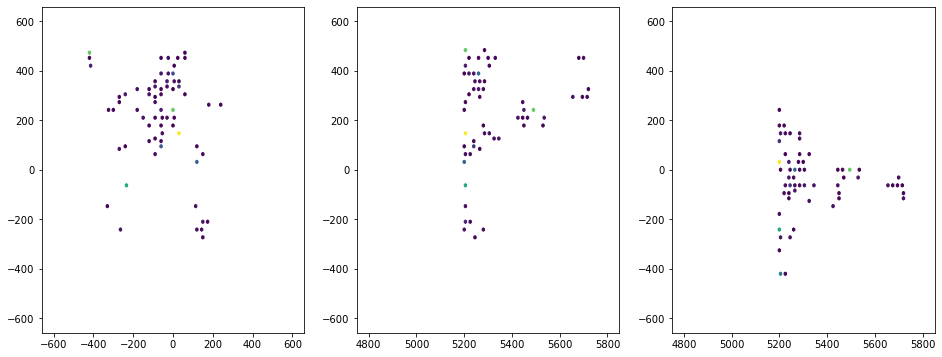

In [16]:
x = arrays['LeakedHits.position.x'][17,:]
y = arrays['LeakedHits.position.y'][17,:]
z = arrays['LeakedHits.position.z'][17,:]
e = 1000.0*arrays['LeakedHits.energy'][17,:]

mask= e>0

fig,ax = plt.subplots(1,3, figsize=(16, 6))

ax[0].hexbin(x[mask],y[mask],C=e,gridsize=100,extent=(-600,600,-600,600))


ax[1].hexbin(z[mask],y[mask],C=e,gridsize=100,extent=(4800,5800,-600,600))
ax[2].hexbin(z[mask],x[mask],C=e,gridsize=100,extent=(4800,5800,-600,600))

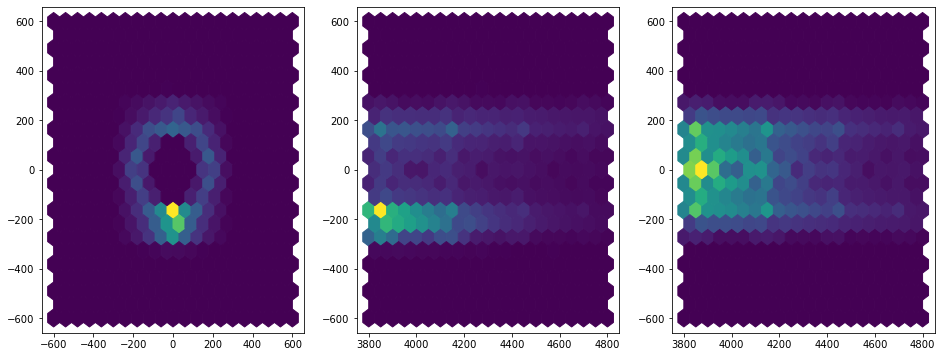

In [17]:
fig,ax = plt.subplots(1,3, figsize=(16, 6))
x = ak.flatten(arrays['HcalEndcapPInsertHits.position.x'])
y = ak.flatten(arrays['HcalEndcapPInsertHits.position.y'])
z = ak.flatten(arrays['HcalEndcapPInsertHits.position.z'])
e = 1000.0*ak.flatten(arrays['HcalEndcapPInsertHits.energy'])
ax[0].hexbin(x,y,gridsize=20,extent=(-600,600,-600,600))
ax[1].hexbin(z,y,gridsize=20,extent=(3800,4800,-600,600))
ax[2].hexbin(z,x,gridsize=20,extent=(3800,4800,-600,600))

1496.2877


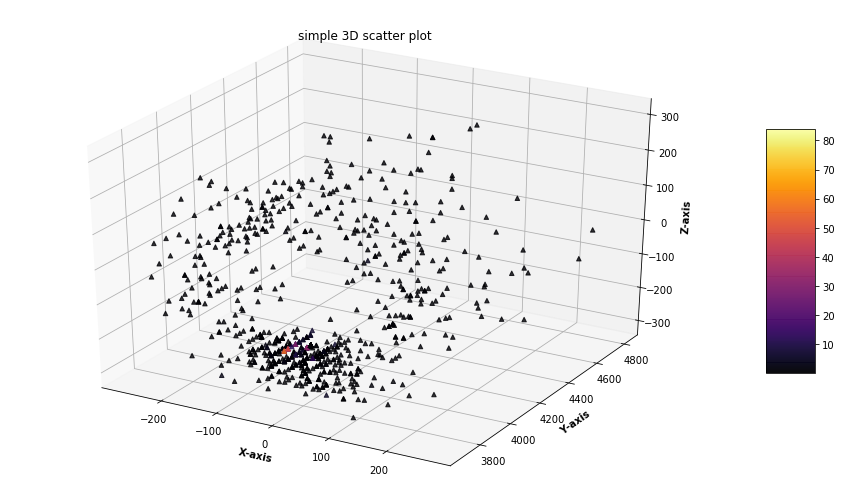

In [18]:
#%matplotlib inline
#%matplotlib notebook
import matplotlib as matplotlib
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D 
# Creating figure
x = arrays['HcalEndcapPInsertHits.position.x'][:,7]
y = arrays['HcalEndcapPInsertHits.position.y'][:,7]
z = arrays['HcalEndcapPInsertHits.position.z'][:,7]
e = 1000.0*arrays['HcalEndcapPInsertHits.energy'][:,7]
print(np.sum(e))
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
my_cmap = plt.get_cmap('inferno')
 
# Creating plot
sctt = ax.scatter3D(x, z, y,
                    alpha = 0.8,
                    c = e,
                    cmap = my_cmap,
                    #norm=matplotlib.colors.LogNorm(),
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')


fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

299.17566


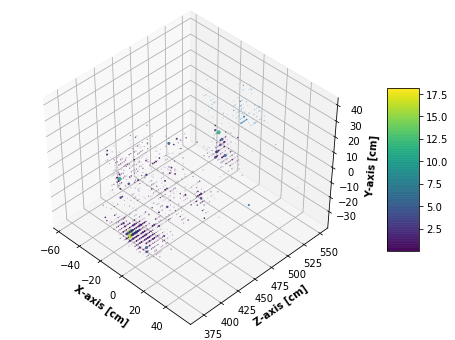

In [19]:
#%matplotlib inline
#%matplotlib notebook
import matplotlib as matplotlib
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D 
# Creating figure

event = 9
x = arrays['HcalEndcapPInsertHits.position.x'][event,:]/10.0
y = arrays['HcalEndcapPInsertHits.position.y'][event,:]/10.0
z = arrays['HcalEndcapPInsertHits.position.z'][event,:]/10.0
e = 1000.0*arrays['HcalEndcapPInsertHits.energy'][event,:]
leaked_e = 1000.0*arrays['LeakedHits.energy'][event,:]


leaked_x = arrays['LeakedHits.position.x'][event,:]/10.0
leaked_y = arrays['LeakedHits.position.y'][event,:]/10.0
leaked_z = arrays['LeakedHits.position.z'][event,:]/10.0
leaked_e = 1000.0*arrays['LeakedHits.energy'][event,:]

print(np.sum(e))
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
my_cmap = plt.get_cmap('viridis')
inferno =  plt.get_cmap('inferno')
# Creating plot
sctt = ax.scatter3D(x, z, y,
                    alpha = 0.8,
                    c = e,
                    s=e,
                    cmap = my_cmap,
                    #norm=matplotlib.colors.LogNorm(),
                    marker ='H')

sctt_leaked = ax.scatter3D(leaked_x, leaked_z, leaked_y,
                    alpha = 0.8,
#                    c = leaked_e,
                    s=leaked_e,
 #                   cmap = inferno,
                    #norm=matplotlib.colors.LogNorm(),
                    marker ='H')
 
 
ax.set_xlabel('X-axis [cm]', fontweight ='bold')
ax.set_ylabel('Z-axis [cm]', fontweight ='bold')
ax.set_zlabel('Y-axis [cm]', fontweight ='bold')
ax.view_init(-120, 160)
#plt.title('Energy: %2.1f MeV, number of hits: %2.0f'%(np.sum(e),len(e)))
#plt.subtitle('Leaked Energy: %2.2f MeV, Leaked number of hits: %2.0f'%(np.sum(leaked_e),len(leaked_e)))

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
ax.view_init(90, 0)
fig.savefig('pic1.png')
ax.view_init(0, -90)
fig.savefig('pic2.png')

ax.view_init(90, -90)
fig.savefig('pic3.png')

ax.view_init(45, -45)
fig.savefig('pic4.png')
plt.show()

319.2111


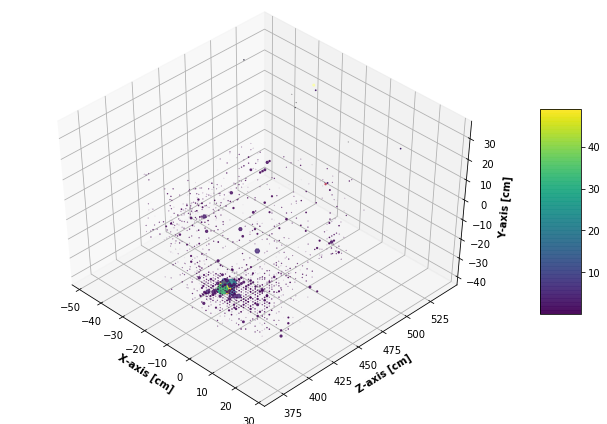

333.79202


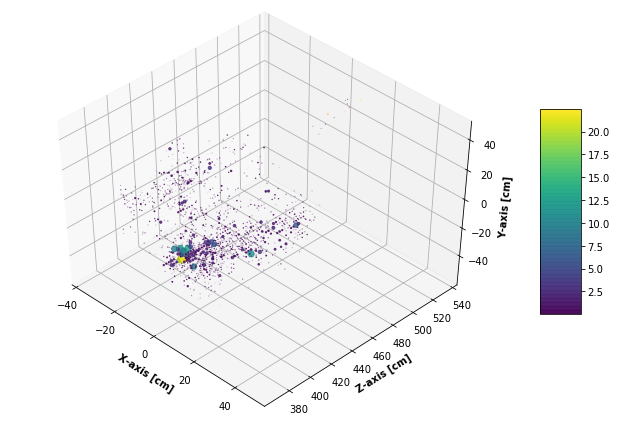

321.1749


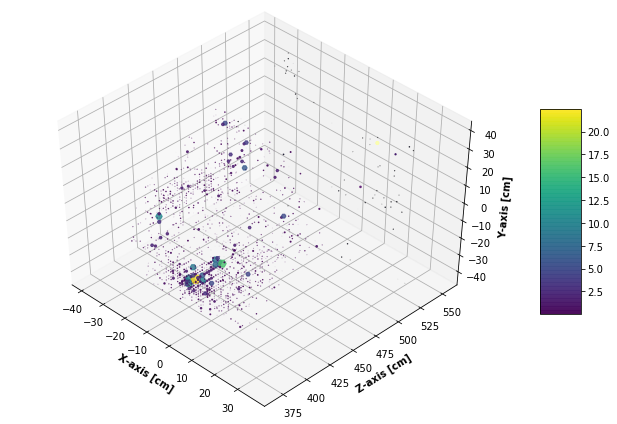

219.87608


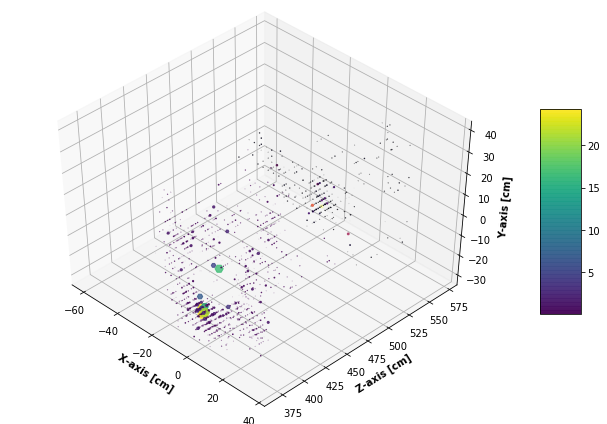

274.17847


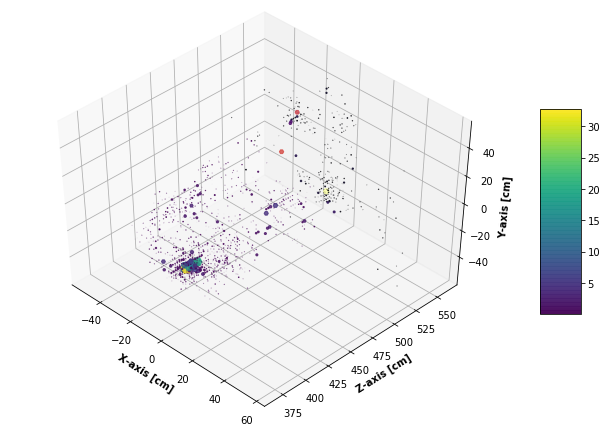

339.86908


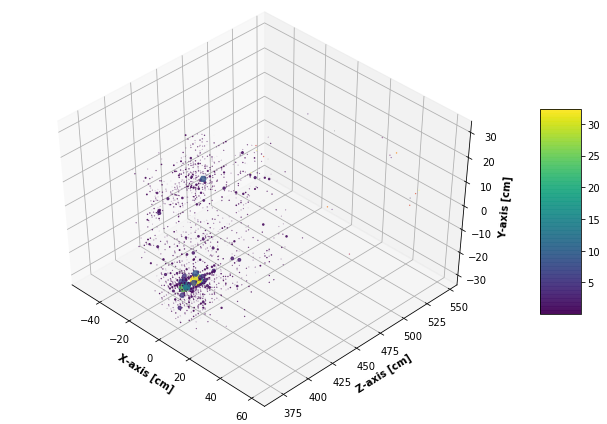

262.26306


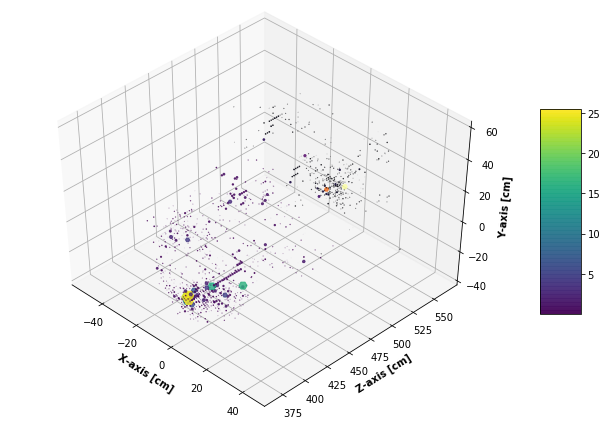

260.40347


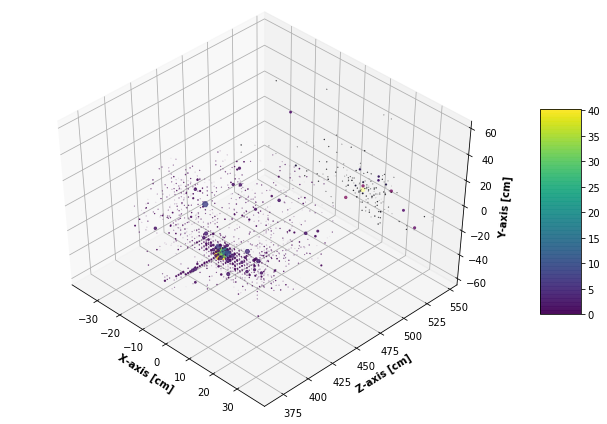

In [20]:
import matplotlib as matplotlib
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D 
# Creating figure

for event in range(1,9):
    
    x = arrays['HcalEndcapPInsertHits.position.x'][event,:]/10.0
    y = arrays['HcalEndcapPInsertHits.position.y'][event,:]/10.0
    z = arrays['HcalEndcapPInsertHits.position.z'][event,:]/10.0
    e = 1000.0*arrays['HcalEndcapPInsertHits.energy'][event,:]

    leaked_x = arrays['LeakedHits.position.x'][event,:]/10.0
    leaked_y = arrays['LeakedHits.position.y'][event,:]/10.0
    leaked_z = arrays['LeakedHits.position.z'][event,:]/10.0
    leaked_e = 1000.0*arrays['LeakedHits.energy'][event,:]

    print(np.sum(e))
    fig = plt.figure(figsize = (9, 6))
    ax = plt.axes(projection ="3d")
   
    ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
    my_cmap = plt.get_cmap('viridis')
    inferno =  plt.get_cmap('inferno')
# Creating plot
    sctt = ax.scatter3D(x, z, y,
                    alpha = 0.8,
                    c = e,
                    s=4*e,
                    cmap = my_cmap,
                    #norm=matplotlib.colors.LogNorm(),
                    marker ='H')

    fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

    sctt_leaked = ax.scatter3D(leaked_x, leaked_z, leaked_y,
                    alpha = 0.8,
                    c = leaked_e,
                    s=4*leaked_e,
                    cmap = inferno,
                    #norm=matplotlib.colors.LogNorm(),
                    marker ='H')
 
 
    ax.set_xlabel('X-axis [cm]', fontweight ='bold')
    ax.set_ylabel('Z-axis [cm]', fontweight ='bold')
    ax.set_zlabel('Y-axis [cm]', fontweight ='bold')
    ax.view_init(-120, 160)
#plt.title('Energy: %2.1f MeV, number of hits: %2.0f'%(np.sum(e),len(e)))
#plt.subtitle('Leaked Energy: %2.2f MeV, Leaked number of hits: %2.0f'%(np.sum(leaked_e),len(leaked_e)))

    #fig.colorbar(sctt_leaked, ax = ax, shrink = 0.5, aspect = 5)

    plt.tight_layout()
# show plot
    ax.view_init(90, 0)
    fig.savefig('pic1_event%i.png'%(event))
    ax.view_init(0, -90)
    fig.savefig('pic2_event%i.png'%(event))

    ax.view_init(90, -90)
    fig.savefig('pic3_event%i.png'%(event))

    ax.view_init(45, -45)
    fig.savefig('pic4_event%i.png'%(event))
    plt.show()

In [ ]:
x = ak.flatten(arrays['HcalEndcapPInsertHits.position.x'])
y = ak.flatten(arrays['HcalEndcapPInsertHits.position.y'])
z = ak.flatten(arrays['HcalEndcapPInsertHits.position.z'])
plt.hexbin(x,y,gridsize=20,extent=(-600,600,-600,600))

In [ ]:
x = ak.flatten(arrays['LeakedHits.position.x'])
y = ak.flatten(arrays['LeakedHits.position.y'])
z = ak.flatten(arrays['LeakedHits.position.z'])
plt.hexbin(x,y,gridsize=20,extent=(-600,600,-600,600))

In [ ]:
#Average hit energy, one per event. 
MIP =.60# 1.25
#1MIP= 1 MeV  (2 MeV/cm)
#The thickness of the scintillator is 0.5 cm
#average per tile: 4 MeV (above 0.1 MeV)
#print(np.mean(averages))
#get a mask that selects all hits in the events that are larger than the average, 
#or larger than 5 MIPS

hits = 1000.0*arrays['HcalEndcapPInsertHits.energy'][:,:]

print('Hits energy [MeV] =', hits)


averages = ak.mean(hits,axis=-1)
print('Average hit energy in the event \n', averages)
print('Average over events =%2.2f MeV \n'%(1.0*np.mean(averages)))


mask_basic = hits >0.1*MIP
print('energy arrays masked =', hits[mask_basic])
print('Applying a mask for cell energies > 0.1 MIPs')
hits = hits[mask_basic]


averages = ak.mean(hits,axis=-1)
print('Average hit energy ', averages)
print('Average over events =%2.3f MeV'%(1.0*np.mean(averages)))
mask_AboveAverage = hits>averages[:]
mask_Above5MIPS = hits>5.0*MIP

print('hits above average', hits[mask_AboveAverage])
print('hits above 5 MIPS ', hits[mask_Above5MIPS])

#mask_AboveAverage= mask_AboveAverage*mask_basic
#mask_Above5MIPS = mask_Above5MIPS*mask_basic

#Number of hits in the event:
nhits = ak.num(hits)
nhits_AboveAverage = ak.num(hits[mask_AboveAverage])
nhits_Above5MIPS = ak.num(hits[mask_Above5MIPS])
C_th = nhits_Above5MIPS/nhits
C_av = nhits_AboveAverage/nhits
C_global = C_th/C_av
print('Len C', len(C_global))
energy = ak.sum(hits,axis=-1)
print('energy' , energy)


print('All hits above 0.1 MIP\n' , nhits)
print('#### Average number of hits above 0.1 MIP\n', np.mean(nhits))
print(' Fraction above 5 MIPS\n ', C_th)
print('#### Average hit fraction above 5 MIPS = %2.3f\n'%(np.mean(C_th)))
print(' Fraction above average \n', C_av)
print('#### Average hit fraction above average = %2.3f\n'%(np.mean(C_av)))

print('#### Average tile energy [MeV] \n', averages)
print('C global' , C_global)
print('#### Average C global=%2.3f\n'%(np.mean(C_global)))
#print(ak.num(arrays['HCALHitsReco.energy'][:100, :]))
#print(arrays['HCALHitsReco.energy'][:100, :])
#print(arrays['HCALHitsReco.energy'][:100, :][mask_AboveAverage])

In [ ]:
fig = plt.figure( figsize=(9, 6))

plt.hist(energy,bins=100)#energy = ak.sum(arrays['HCALHitsReco.energy'][:2, :],axis=-1)
#plt.xlabel('$C_{global} = C_{th}/C_{av}$')
#plt.ylabel('HCAL energy [GeV]')
#plt.xlim([0,1.4])
#plt.ylim([0,2.5])
print(np.mean(energy))

rescaled = (energy - np.mean(energy))/np.mean(energy)
plt.show()

In [ ]:
rescaled = (energy - np.mean(energy))/np.mean(energy)
plt.hist(rescaled,bins=20)
print(np.std(rescaled) *np.sqrt(30))
plt.show()

In [ ]:
fig = plt.figure( figsize=(9, 6))

plt.plot(C_global,energy/1000.0,'.')#energy = ak.sum(arrays['HCALHitsReco.energy'][:2, :],axis=-1)
plt.xlabel('$C_{global} = C_{th}/C_{av}$')
plt.ylabel('HCAL energy [GeV]')
#plt.xlim([0,1.4])
#plt.ylim([0,2.5])
print(len(C_global))
print(len(energy))
print(C_global)

a = np.array(C_global.to_numpy())
b = np.array(energy)

print(' coeff ' , np.corrcoef(a,b))

In [ ]:
fig = plt.figure( figsize=(9, 6))

plt.plot(C_global,rescaled,'.')#energy = ak.sum(arrays['HCALHitsReco.energy'][:2, :],axis=-1)
plt.xlabel('$C_{global} = C_{th}/C_{av}$')
plt.ylabel('HCAL energy [GeV]')
plt.xlim([0,2.0])
plt.ylim([-1,0.6])

In [ ]:
fig = plt.figure( figsize=(9, 6))

plt.hist(C_th,bins=40,range=(0,1),alpha=0.5,density=True,label='$C_{th}$')
plt.hist(C_av,bins=40,range=(0,1),alpha=0.5,density=True,label='$C_{av}$')
plt.hist(C_global,bins=40,range=(0,1),alpha=0.5,density=True,label='$C_{global}$')
plt.legend()
plt.ylabel('entries')
plt.show()

In [ ]:
fig = plt.figure( figsize=(9, 6))
plt.hist(nhits,bins=100,range=(0,1000),alpha=0.5,label='hits above 0.1 MIP')
plt.hist(nhits_AboveAverage,bins=100,range=(0,1000),alpha=0.5,label='hits above average')
plt.hist(nhits_Above5MIPS,bins=100,range=(0,1000),alpha=0.5,label='hits above 5 MIPS')
plt.legend()
plt.title('50 GeV')
plt.ylabel('entries')
#plt.yscale('log')
print(len(nhits))
print(len(nhits_AboveAverage))
print(np.mean(nhits))

In [ ]:
fig = plt.figure( figsize=(9, 6))
plt.hist(ak.flatten(hits),bins=800,range=(0.1,200),alpha=0.5,label='Hits above 0.1 MIP')
plt.hist(ak.flatten(hits[mask_AboveAverage]),range=(0.1,200),bins=800,alpha=0.5,label='Hits above average')
plt.hist(ak.flatten(hits[mask_Above5MIPS]),range=(0.1,200),bins=800,alpha=0.5,label='Hits above 5 MIP')

#plt.axhline(x=MIP)
plt.legend(loc='best')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('entries')
plt.xlabel('hit energy [MeV]')
plt.show()

print('Average energy: ', np.mean(ak.flatten(hits)))
print('Average energy: ', np.mean(ak.mean(hits,axis=-1)))

In [ ]:
pz = ak.to_numpy(arrays['MCParticles.momentum.z'][:,-1])
py = ak.to_numpy(arrays['MCParticles.momentum.y'][:,-1])
px = ak.to_numpy(arrays['MCParticles.momentum.x'][:,-1])
mass = ak.to_numpy(arrays['MCParticles.mass'][:,-1])
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass
print(len(p))
